# Dunnhumby Churn Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
data = pd.read_csv('/content/drive/My Drive/churn_prediction_sokan/transaction_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [ ]:
data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86cbfe4e80>]],
      dtype=object)

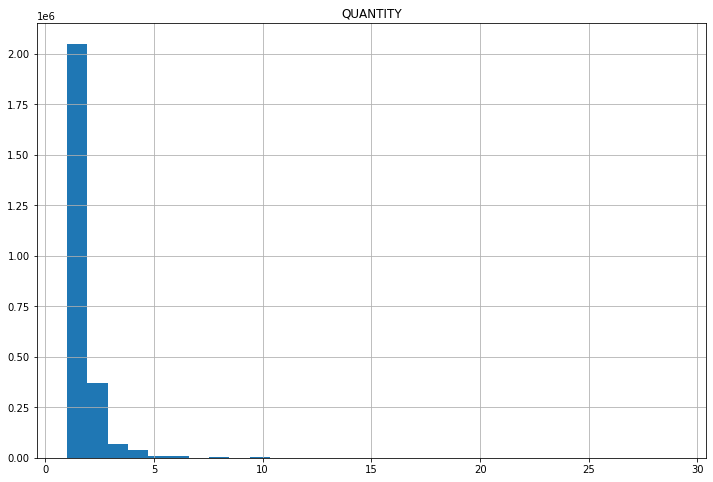

In [ ]:
data[(data['QUANTITY'] < 30) & (data['QUANTITY'] > 0 )].hist(['QUANTITY'], bins=30, figsize=(12,8))


In [ ]:
data['SALES_VALUE'].value_counts()

1.00     163007
2.00     144237
2.50     103428
2.99      94600
1.99      77334
          ...  
32.48         1
54.49         1
54.51         1
59.25         1
78.50         1
Name: SALES_VALUE, Length: 5502, dtype: int64

In [ ]:
data['RETAIL_DISC'].value_counts()

 0.00     1292670
-0.49       59997
-0.20       44974
-0.99       41514
-0.29       40460
           ...   
-22.23          1
-22.20          1
-22.98          1
-38.34          1
-16.45          1
Name: RETAIL_DISC, Length: 2414, dtype: int64

In [ ]:
data[data['QUANTITY'] < 0]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC


In [ ]:
data[data['RETAIL_DISC'] < 0]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595721,1598,42305362497,711,17295222,1,1.00,3228,-0.49,1516,102,0.0,0.0
2595722,1598,42305362497,711,17904923,1,1.00,3228,-0.08,1516,102,0.0,0.0
2595723,1598,42305362535,711,45277,1,1.00,3228,-0.50,1520,102,0.0,0.0
2595726,1598,42305362535,711,52641,1,1.25,3228,-0.35,1520,102,0.0,0.0


In [ ]:
data[(data['household_key']==2375)&(data['BASKET_ID']==26984851472)]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [ ]:
data[(data['PRODUCT_ID']==1033142)&(data['QUANTITY']== 1)]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0
7785,805,27165356331,16,1033142,1,0.77,306,0.0,1424,3,0.0,0.0
10437,1551,27213060803,20,1033142,1,1.98,355,0.0,1156,4,0.0,0.0
34934,131,27493368542,43,1033142,1,1.21,333,0.0,1906,7,0.0,0.0
35783,872,27505277548,44,1033142,1,3.29,450,0.0,1821,7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2579174,1145,42237955124,707,1033142,1,0.68,360,0.0,905,102,0.0,0.0
2581729,1229,42250692763,708,1033142,1,0.68,384,0.0,1708,102,0.0,0.0
2588947,1778,42276414347,710,1033142,1,0.79,34280,0.0,1738,102,0.0,0.0
2589026,1506,42276425906,710,1033142,1,1.08,289,0.0,1609,102,0.0,0.0


In [ ]:
data[(data['SALES_VALUE']==0)&(data['QUANTITY'] == 0)]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
97,744,26985165432,1,5978648,0,0.0,31582,0.0,1119,1,0.0,0.0
128,1287,26985336468,1,5978648,0,0.0,304,0.0,1351,1,0.0,0.0
249,2305,26996870743,2,5978656,0,0.0,414,0.0,1300,1,-1.0,0.0
293,271,26997082949,2,5978656,0,0.0,329,0.0,1719,1,-2.0,0.0
694,315,27008952267,3,957951,0,0.0,327,0.0,1707,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595140,1146,42289881473,711,5978648,0,0.0,304,0.0,1456,102,0.0,0.0
2595262,539,42289891395,711,5978648,0,0.0,380,0.0,1232,102,0.0,0.0
2595280,2338,42289891597,711,5978656,0,0.0,380,0.0,1258,102,-1.0,0.0
2595563,1098,42289918722,711,5978648,0,0.0,343,0.0,1447,102,0.0,0.0


In [ ]:
data[data['PRODUCT_ID']==951412]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
567,1016,27008846527,3,951412,1,1.11,31642,-1.13,1436,1,0.0,0.0
996,568,27021090189,4,951412,1,0.00,446,-1.48,35,1,0.0,0.0
1561,1016,27031018293,5,951412,1,1.35,367,-1.37,1437,1,0.0,0.0
1613,381,27031050789,5,951412,1,0.34,32004,-0.35,1102,1,0.0,0.0
6917,2231,27153510617,15,951412,1,3.74,367,0.00,1924,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2584702,871,42263415143,709,951412,1,2.96,432,0.00,740,102,0.0,0.0
2586412,2233,42263700728,709,951412,1,1.97,369,0.00,1826,102,0.0,0.0
2590846,1982,42289326608,711,951412,1,2.03,367,0.00,1104,102,0.0,0.0
2592791,1229,42289588691,711,951412,1,2.78,384,0.00,1651,102,0.0,0.0


In [ ]:
data_cleaned = data.drop(index=data[data['SALES_VALUE']==0].index)

In [ ]:
data_cleaned[data_cleaned['SALES_VALUE']==0]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC


### Check Missing Value

In [ ]:
data_cleaned[data_cleaned['household_key'].isna()]


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC


In [ ]:
data_cleaned[data_cleaned['SALES_VALUE'].isna()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC


In [ ]:
data_cleaned[data_cleaned['BASKET_ID'].isna()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC


### Exploration on Customers

In [ ]:
data_cleaned_customer_not_none = data_cleaned.copy()

In [ ]:
import math

In [ ]:
def convert_transactions_to_customers(transactions, max_date, min_date):
          ### recency ###
        transactions['recency_days'] = (
                max_date - transactions['DAY']
        )

        ### latency ###
        transactions['latency_days'] = (
                transactions['DAY'] - min_date
        )

        customers_in_window = transactions.groupby(['household_key']).agg({
            'BASKET_ID': pd.Series.nunique,
            'recency_days': ['min', 'std', 'mean'],
            'latency_days': ['min', 'std', 'mean'],
            'SALES_VALUE': ['sum', 'std', 'mean', 'min', 'max'],
            'PRODUCT_ID': pd.Series.nunique,
        })

        ### Periodicity ###
        customer_invoice = transactions.groupby(['household_key', 'BASKET_ID']).agg({
            'DAY': 'min'
        })

        periodicity_min = []
        periodicity_max = []
        periodicity_std = []
        periodicity_mean = []
        periodicity_median = []

        for customer_code, _ in customers_in_window.iterrows():
          time_series = customer_invoice.loc[customer_code]['DAY']
          diff_days = pd.Series(time_series).diff()
          diff_days = pd.Series([math.fabs(x) for x in diff_days])
          periodicity_min.append(diff_days.min())
          periodicity_median.append(diff_days.median())
          periodicity_mean.append(diff_days.mean())
          periodicity_std.append(diff_days.std())
          periodicity_max.append(diff_days.max())

        customers_in_window['periodicity_min'] = periodicity_min
        customers_in_window['periodicity_max'] = periodicity_max
        customers_in_window['periodicity_mean'] = periodicity_mean
        customers_in_window['periodicity_median'] = periodicity_median
        customers_in_window['periodicity_std'] = periodicity_std

        ### Duration ###
        customers_in_window['duration'] = (max(transactions['DAY']) - min(transactions['DAY'])) - (
        customers_in_window['latency_days']['min'] + customers_in_window['recency_days']['min'] - 1)

        ### Duration per Frequency ###
        customers_in_window['D/F'] = customers_in_window['duration'] / customers_in_window['BASKET_ID']['nunique']

        ### AOV ###
        customers_in_window['AOV'] = customers_in_window['SALES_VALUE']['sum'] / customers_in_window['BASKET_ID']['nunique']

        ### Assortment/Invoice ###
        customers_in_window['assortment/invoice'] = customers_in_window['PRODUCT_ID']['nunique'] / customers_in_window['BASKET_ID']['nunique']

        customers_in_window.fillna(-1, inplace=True)  # to replace std none values

        customers_in_window.columns = ['_'.join(col).strip() for col in customers_in_window.columns.values]
        customers_in_window.rename(
            columns={
                'BASKET_ID_nunique': 'frequency',
                'recency_days_min': 'recency',
                'latency_days_min': 'latency',
                'SALES_VALUE_sum': 'monetary',
                'PRODUCT_ID_nunique': 'product_diversity',
                'periodicity_min_': 'periodicity_min',
                'periodicity_max_': 'periodicity_max',
                'periodicity_mean_': 'periodicity_mean',
                'periodicity_median_': 'periodicity_median',
                'periodicity_std_': 'periodicity_std',
                'D/F_': 'D/F',
                'AOV_': 'AOV',
                'duration_': 'duration',
                'assortment/invoice_': 'assortment/invoice',
            },
            inplace=True,
        )
        customers_in_window = customers_in_window[
            ['frequency',
             'recency',
             'monetary' ,
             'latency',
             'recency_days_mean',
             'recency_days_std',
             'latency_days_mean',
             'latency_days_std',
             'SALES_VALUE_std',
             'SALES_VALUE_mean',
             'SALES_VALUE_min',
             'SALES_VALUE_max',
             'product_diversity',
             'periodicity_min',
             'periodicity_max',
             'periodicity_mean',
             'periodicity_median',
             'periodicity_std',
             'duration',
             'D/F',
             'AOV',
             'assortment/invoice']
        ]

        return customers_in_window

In [ ]:
customers = convert_transactions_to_customers(
    transactions=data_cleaned_customer_not_none,
    max_date=max(data_cleaned_customer_not_none['DAY']),
    min_date=min(data_cleaned_customer_not_none['DAY']),
)
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frequency           2500 non-null   int64  
 1   recency             2500 non-null   int64  
 2   monetary            2500 non-null   float64
 3   latency             2500 non-null   int64  
 4   recency_days_mean   2500 non-null   float64
 5   recency_days_std    2500 non-null   float64
 6   latency_days_mean   2500 non-null   float64
 7   latency_days_std    2500 non-null   float64
 8   SALES_VALUE_std     2500 non-null   float64
 9   SALES_VALUE_mean    2500 non-null   float64
 10  SALES_VALUE_min     2500 non-null   float64
 11  SALES_VALUE_max     2500 non-null   float64
 12  product_diversity   2500 non-null   int64  
 13  periodicity_min     2500 non-null   float64
 14  periodicity_max     2500 non-null   float64
 15  periodicity_mean    2500 non-null   float64
 16  period

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

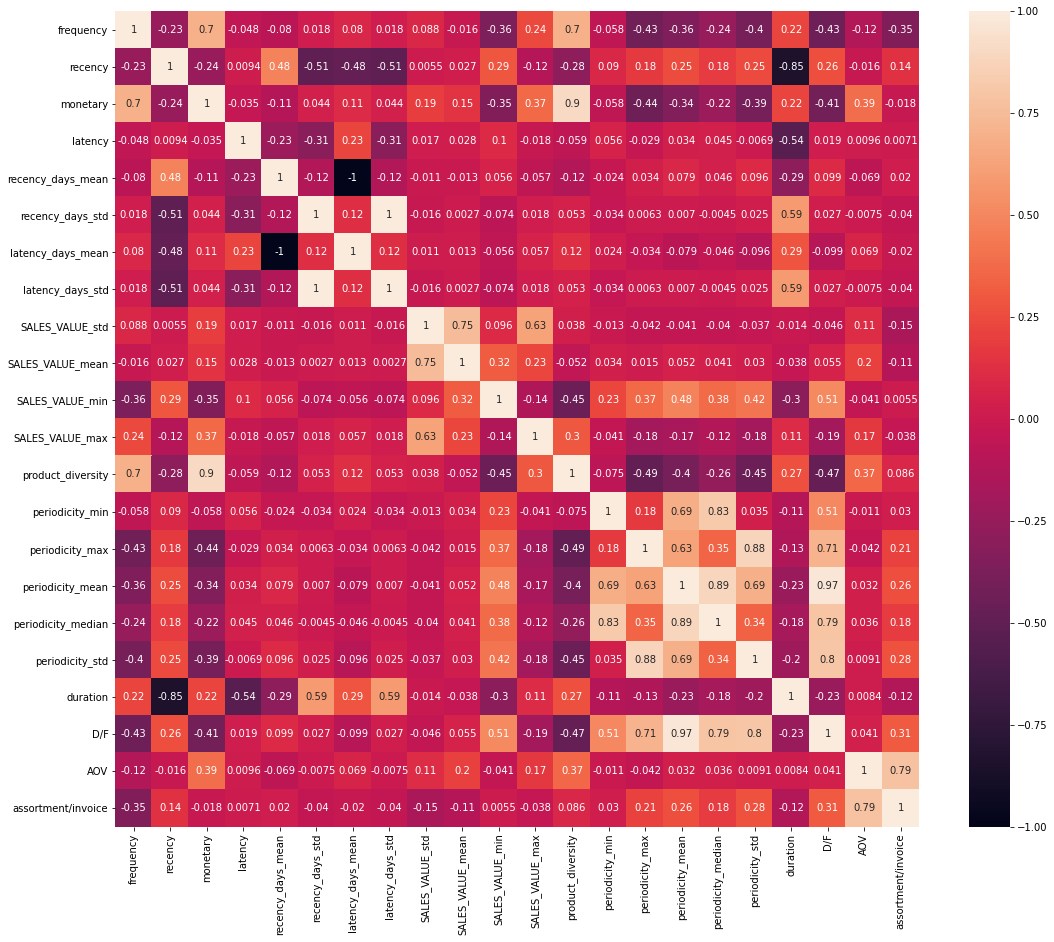

In [ ]:
fig, ax = plt.subplots(figsize=(18,15)) 
sns.heatmap(customers.corr(), ax=ax, annot=True)

In [ ]:
customers.head(5)

,frequency,recency,monetary,latency,recency_days_mean,recency_days_std,latency_days_mean,latency_days_std,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,product_diversity,periodicity_min,periodicity_max,periodicity_mean,periodicity_median,periodicity_std,duration,D/F,AOV,assortment/invoice
household_key,,,,,,,,,,,,,,,,,,,,,,
1,85,5,4330.16,50,316.977153,187.868862,393.022847,187.868862,1.471201,2.536708,0.34,12.50,673,0.0,21.0,7.988095,8.5,5.193819,656,7.717647,50.943059,7.917647
2,45,43,1954.34,102,327.082865,190.035092,382.917135,190.035092,2.176047,2.744860,0.10,21.99,545,1.0,70.0,12.840909,7.5,14.612742,566,12.577778,43.429778,12.111111
3,47,8,2653.21,112,407.210011,146.107447,302.789989,146.107447,2.591894,2.887062,0.20,29.37,514,0.0,64.0,12.826087,9.0,12.588009,591,12.574468,56.451277,10.936170
4,30,84,1200.11,103,439.786667,146.735974,270.213333,146.735974,5.266746,4.000367,0.40,37.34,164,1.0,88.0,18.034483,13.0,17.837526,524,17.466667,40.003667,5.466667
5,40,8,779.06,84,435.833333,159.457520,274.166667,159.457520,3.109104,3.509279,0.34,21.99,199,0.0,104.0,15.846154,10.0,21.700762,619,15.475000,19.476500,4.975000


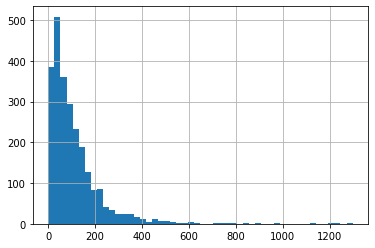

In [ ]:
customers['frequency'].hist(bins=50)

In [ ]:
customers['frequency'].describe()

count    2500.000000
mean      110.216800
std       115.271537
min         1.000000
25%        38.000000
50%        78.000000
75%       142.000000
max      1298.000000
Name: frequency, dtype: float64

In [ ]:
customers[customers['frequency'] < 10]

,frequency,recency,monetary,latency,recency_days_mean,recency_days_std,latency_days_mean,latency_days_std,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,product_diversity,periodicity_min,periodicity_max,periodicity_mean,periodicity_median,periodicity_std,duration,D/F,AOV,assortment/invoice
household_key,,,,,,,,,,,,,,,,,,,,,,
10,9,26,234.34,113,390.828571,249.220580,319.171429,249.220580,3.397978,3.347714,0.27,20.00,65,0.0,357.0,71.375000,8.0,129.399644,572,63.555556,26.037778,7.222222
11,5,299,33.39,109,493.666667,128.679721,216.333333,128.679721,0.954249,1.855000,0.62,3.99,17,9.0,189.0,75.500000,52.0,84.870490,303,60.600000,6.678000,3.400000
12,7,207,266.21,71,382.659091,155.368371,327.340909,155.368371,2.158630,3.025114,0.40,13.35,75,5.0,156.0,72.000000,58.5,58.549125,433,61.857143,38.030000,10.714286
60,8,14,400.94,90,565.962617,131.853043,144.037383,131.853043,5.835687,3.747103,0.25,39.99,98,1.0,410.0,86.571429,23.0,147.117705,607,75.875000,50.117500,12.250000
102,8,532,304.84,47,606.537736,26.043983,103.462264,26.043983,2.216732,2.875849,0.50,12.50,92,1.0,44.0,18.714286,16.0,16.938263,132,16.500000,38.105000,11.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,6,111,178.68,15,348.795455,128.644941,361.204545,128.644941,3.921067,2.030455,0.30,29.98,85,48.0,246.0,116.800000,92.0,78.416835,585,97.500000,29.780000,14.166667
2417,9,5,196.11,12,469.046875,172.409666,240.953125,172.409666,2.886229,3.064219,0.61,18.86,58,14.0,282.0,86.625000,79.0,84.761746,694,77.111111,21.790000,6.444444
2422,5,270,368.07,25,593.084906,170.574163,116.915094,170.574163,3.946339,3.472358,0.50,36.81,92,3.0,391.0,103.750000,10.5,191.567873,416,83.200000,73.614000,18.400000


In [ ]:
customers[customers['frequency'] >= 10]['frequency'].describe()

count    2402.000000
mean      114.462115
std       115.627421
min        10.000000
25%        42.000000
50%        82.000000
75%       147.000000
max      1298.000000
Name: frequency, dtype: float64

#### remove customers with at most ten transaction

In [ ]:
data_cleaned_customer_not_none = data_cleaned_customer_not_none[
    data_cleaned_customer_not_none['household_key'].isin(
        customers[customers['frequency'] > 10].index
    )
]
data_cleaned_customer_not_none.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568077 entries, 0 to 2595731
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
 12  recency_days       int64  
 13  latency_days       int64  
dtypes: float64(4), int64(10)
memory usage: 293.9 MB


In [ ]:
pd.Series([x for x in customers[customers['frequency'] > 10]['D/F'] if x != 0]).mean()

11.197390802414876

Average of D/F equals to 11 days. This value will be used for some problem parameters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86bd27acc0>,
      dtype=object)

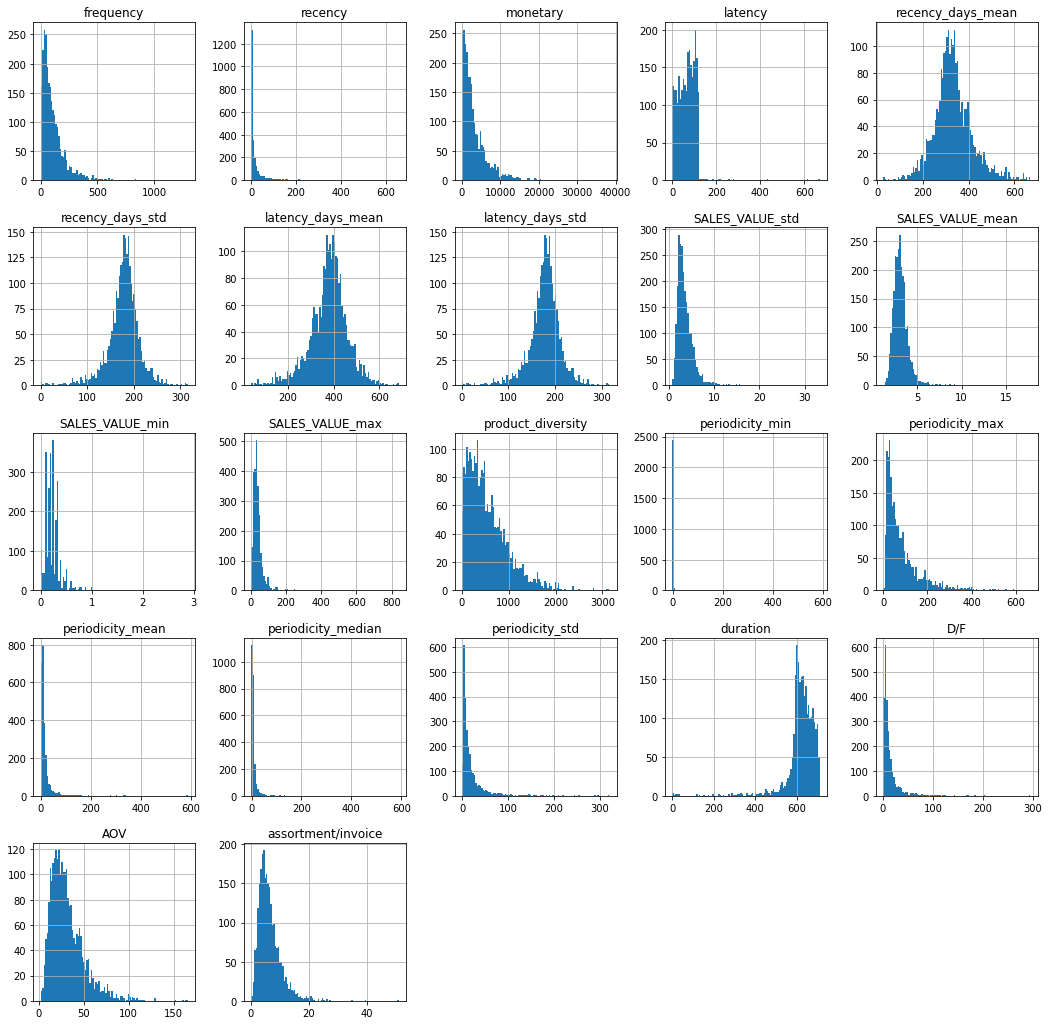

In [ ]:
customers.hist(figsize=(18,18), bins=100)

### Split test data

In [ ]:
import datetime


some problem parameters :

    - M refers to size of window for customer behavior
    - N refers to size of window to define churned customers. It set to 2 * avg of D/F

find number of unique days with transaction to set proper stride

In [ ]:
pd.Series(data_cleaned_customer_not_none['DAY']).nunique()

711

Interval for all transactions is from 1399-01-01 to 1399-08-01 about 711 days. stride should be about 711/711 ~= 1

In [ ]:
M = 40
N = 20
STRIDE_STEP = 2

In [ ]:
max(data_cleaned_customer_not_none['DAY']), min(data_cleaned_customer_not_none['DAY'])

(711, 1)

In [ ]:
threshold_for_train_data = max(data_cleaned_customer_not_none['DAY']) - M
threshold_for_test_data = max(data_cleaned_customer_not_none['DAY']) - M - N
threshold_for_test_data, threshold_for_train_data

(651, 671)

In [ ]:
data_cleaned_customer_not_none_for_test = data_cleaned_customer_not_none[
    data_cleaned_customer_not_none['DAY'] > threshold_for_test_data
]

In [ ]:
data_cleaned_customer_not_none_for_learn = data_cleaned_customer_not_none[
    data_cleaned_customer_not_none['DAY'] < threshold_for_train_data
]

In [ ]:
data_cleaned_customer_not_none_for_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248787 entries, 2340645 to 2595731
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   household_key      248787 non-null  int64  
 1   BASKET_ID          248787 non-null  int64  
 2   DAY                248787 non-null  int64  
 3   PRODUCT_ID         248787 non-null  int64  
 4   QUANTITY           248787 non-null  int64  
 5   SALES_VALUE        248787 non-null  float64
 6   STORE_ID           248787 non-null  int64  
 7   RETAIL_DISC        248787 non-null  float64
 8   TRANS_TIME         248787 non-null  int64  
 9   WEEK_NO            248787 non-null  int64  
 10  COUPON_DISC        248787 non-null  float64
 11  COUPON_MATCH_DISC  248787 non-null  float64
 12  recency_days       248787 non-null  int64  
 13  latency_days       248787 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 28.5 MB


In [ ]:
data_cleaned_customer_not_none_for_test['household_key'].nunique()

2191

In [ ]:
data_cleaned_customer_not_none_for_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399304 entries, 0 to 2429095
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
 12  recency_days       int64  
 13  latency_days       int64  
dtypes: float64(4), int64(10)
memory usage: 274.6 MB


In [ ]:
data_cleaned_customer_not_none_for_learn['household_key'].nunique()

2386

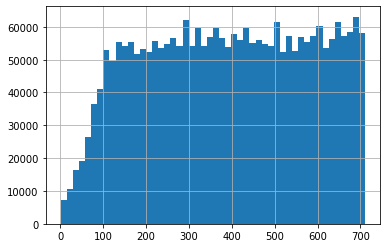

In [ ]:
data_cleaned_customer_not_none['DAY'].hist(bins=50)

### Data Transformation

In [ ]:
import datetime as dt
import math

In [ ]:
raw_data = data_cleaned_customer_not_none_for_learn.copy()

In [ ]:
min_date = min(raw_data['DAY'])
max_date = max(raw_data['DAY'])

min_date, max_date

(1, 670)

#### Convert Based on Time Dependencies

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def transform_data(df, max_date, min_date, stride_step, m, n, append_customer_id=False):

    interval = max_date - min_date
    transformed_data = []
    for i in range(0, interval - m - n + 2, stride_step):
        if i%10 == 0:
          print(i)

        begin_of_interval_to_learn = min_date + i
        end_of_interval_to_learn = begin_of_interval_to_learn + m
        end_of_interval_for_test = end_of_interval_to_learn + n

        windowed_raw_data_to_learn = df[
            (df['DAY'] > begin_of_interval_to_learn) &
            (df['DAY'] < end_of_interval_to_learn)
        ]

        windowed_raw_data_to_test = df[
            (df['DAY'] > end_of_interval_to_learn) &
            (df['DAY'] < end_of_interval_for_test)
        ]

        ### recency ###
        windowed_raw_data_to_learn['recency_days'] = (
                end_of_interval_to_learn - windowed_raw_data_to_learn['DAY']
        )

        ### latency ###
        windowed_raw_data_to_learn['latency_days'] = (
                windowed_raw_data_to_learn['DAY'] - begin_of_interval_to_learn
        )
        
        customers_in_window = windowed_raw_data_to_learn.groupby(['household_key']).agg({
            'BASKET_ID': pd.Series.nunique,
            'recency_days': ['min', 'std', 'mean'],
            'SALES_VALUE': ['sum', 'std', 'mean', 'min', 'max'],
            'latency_days': 'min',
        })
                
        customers_in_window['duration'] = m - (
        customers_in_window['latency_days']['min'] + customers_in_window['recency_days']['min'] - 1)

        ### Duration per Frequency ###
        customers_in_window['D/F'] = m / customers_in_window['BASKET_ID']['nunique']

        customers_in_window.columns = ['_'.join(col).strip() for col in customers_in_window.columns.values]
        customers_in_window.rename(
            columns={
                'BASKET_ID_nunique': 'frequency',
                'recency_days_min': 'recency',
                'latency_days_min': 'latency',
                'SALES_VALUE_sum': 'monetary',
                'D/F_': 'D/F',
                'AOV_': 'AOV',
                'duration_': 'duration',
                'assortment/invoice_': 'assortment/invoice',
            },
            inplace=True,
        )
        customers_in_window = customers_in_window[[
                    'frequency',
                    'recency',
                    'recency_days_std',
                    'recency_days_mean',
                    'monetary',
                    'SALES_VALUE_std',
                    'SALES_VALUE_mean',
                    'SALES_VALUE_min',
                    'SALES_VALUE_max',
                    'latency',
                    'duration',
                    'D/F',
        ]]
        # customers_in_window = pd.DataFrame()
        for j in range(m):
          customers_in_day = windowed_raw_data_to_learn[
            windowed_raw_data_to_learn['DAY']==begin_of_interval_to_learn+j].groupby(
              ['household_key']
              ).agg({
                'QUANTITY': 'sum',
                'SALES_VALUE': 'sum',
                'PRODUCT_ID': pd.Series.nunique,
              })
          customers_in_day = customers_in_day[[
                                               'QUANTITY',
                                               'SALES_VALUE',
                                               'PRODUCT_ID',
          ]]
          customers_in_window = pd.concat(
              [customers_in_window, customers_in_day], axis=1, sort=False
              )
          

        
        for customer_id, features in customers_in_window.iterrows():
            if append_customer_id:
              feature_list = [customer_id]
            else:
              feature_list = []
            feature_list += list(features)
            if len(windowed_raw_data_to_test[
                       windowed_raw_data_to_test['household_key'] == customer_id
                   ]) > 0:
                feature_list.append(0)
            else:
                feature_list.append(1)
            transformed_data.append(feature_list)
    
    
    if append_customer_id:
      column_list = ['household_key']
    else:
      column_list = []
    
    column_list += [
                    'frequency',
                    'recency',
                    'recency_days_std',
                    'recency_days_mean',
                    'monetary',
                    'SALES_VALUE_std',
                    'SALES_VALUE_mean',
                    'SALES_VALUE_min',
                    'SALES_VALUE_max',
                    'latency',
                    'duration',
                    'D/F',
                    ]
    column_list += [y+str(x) for x in range(m) for y in ['quantity_', 'price_', 'sku_id_']]
    column_list += ['label']
    transformed_data_df = pd.DataFrame(transformed_data, columns=column_list)
    return transformed_data_df
    

In [ ]:
transformed_data_df = transform_data(raw_data, max_date, min_date, STRIDE_STEP, M, N)
transformed_data_df.info()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608694 entries, 0 to 608693
Columns: 133 entries, frequency to label
dtypes: float64(132), int64(1)
memory usage: 617.6 MB


In [ ]:
transformed_data_df

,frequency,recency,recency_days_std,recency_days_mean,monetary,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,latency,duration,D/F,quantity_0,price_0,sku_id_0,quantity_1,price_1,sku_id_1,quantity_2,price_2,sku_id_2,quantity_3,price_3,sku_id_3,quantity_4,price_4,sku_id_4,quantity_5,price_5,sku_id_5,quantity_6,price_6,sku_id_6,quantity_7,price_7,sku_id_7,quantity_8,price_8,sku_id_8,quantity_9,...,quantity_27,price_27,sku_id_27,quantity_28,price_28,sku_id_28,quantity_29,price_29,sku_id_29,quantity_30,price_30,sku_id_30,quantity_31,price_31,sku_id_31,quantity_32,price_32,sku_id_32,quantity_33,price_33,sku_id_33,quantity_34,price_34,sku_id_34,quantity_35,price_35,sku_id_35,quantity_36,price_36,sku_id_36,quantity_37,price_37,sku_id_37,quantity_38,price_38,sku_id_38,quantity_39,price_39,sku_id_39,label
0,3.0,8.0,4.925175,12.014925,194.03,1.971986,2.895970,0.69,11.00,22.0,11.0,13.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,107.72,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3.0,11.0,4.802388,32.268293,196.08,1.741073,2.391220,0.30,8.61,3.0,27.0,13.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,68.69,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.43,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.0,19.0,0.000000,19.000000,4.98,0.000000,2.490000,2.49,2.49,21.0,1.0,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4.0,5.0,4.879136,11.164179,322.80,12.325940,4.817910,0.50,101.32,23.0,13.0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,29.07,12.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,80.30,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,47.09,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3.0,1.0,6.422327,9.698413,202.27,2.552343,3.210635,0.88,13.49,24.0,16.0,13.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,60.52,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,60.99,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608689,3.0,17.0,8.044322,25.296296,196.78,1.937497,2.429383,0.25,13.04,7.0,17.0,13.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,112.39,41.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
608690,20.0,1.0,11.003598,16.585938,555.96,4.167401,4.343438,0.69,25.26,5.0,35.0,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,12.68,5.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,29.98,15.0,NaN,...,2.0,4.48,2.0,NaN,NaN,NaN,30.0,134.57,29.0,NaN,NaN,NaN,3.0,14.78,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.01,8.0,17.0,70.19,13.0,10016.0,66.73,11.0,NaN,NaN,NaN,3.0,8.97,2.0,0
608691,10.0,1.0,11.763040,16.021277,133.15,1.544474,2.832979,0.50,6.99,6.0,34.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,33.46,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.93,11.0,3.

In [ ]:
transformed_data_df.fillna(0, inplace=True)

In [ ]:
transformed_data_df.to_csv('/content/drive/My Drive/churn_prediction_sokan/dunnhumby_pattern_customer_time_dep_aggregative_m40_n20_s2.csv')

In [ ]:
import pandas as pd
transformed_data_df = pd.read_csv('/content/drive/My Drive/churn_prediction_sokan/dunnhumby_pattern_customer_time_dep_m40_n20_s2.csv')

In [ ]:
transformed_data_df.head()

,frequency,recency,recency_days_std,recency_days_mean,monetary,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,latency,duration,D/F,quantity_0,price_0,sku_id_0,quantity_1,price_1,sku_id_1,quantity_2,price_2,sku_id_2,quantity_3,price_3,sku_id_3,quantity_4,price_4,sku_id_4,quantity_5,price_5,sku_id_5,quantity_6,price_6,sku_id_6,quantity_7,price_7,sku_id_7,quantity_8,price_8,sku_id_8,quantity_9,...,quantity_27,price_27,sku_id_27,quantity_28,price_28,sku_id_28,quantity_29,price_29,sku_id_29,quantity_30,price_30,sku_id_30,quantity_31,price_31,sku_id_31,quantity_32,price_32,sku_id_32,quantity_33,price_33,sku_id_33,quantity_34,price_34,sku_id_34,quantity_35,price_35,sku_id_35,quantity_36,price_36,sku_id_36,quantity_37,price_37,sku_id_37,quantity_38,price_38,sku_id_38,quantity_39,price_39,sku_id_39,label
0,3.0,8.0,4.925175,12.014925,194.03,1.971986,2.895970,0.69,11.00,22.0,11.0,13.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,52.0,107.72,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
1,3.0,11.0,4.802388,32.268293,196.08,1.741073,2.391220,0.30,8.61,3.0,27.0,13.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,68.69,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,2.0,3.43,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
2,1.0,19.0,0.000000,19.000000,4.98,0.000000,2.490000,2.49,2.49,21.0,1.0,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
3,4.0,5.0,4.879136,11.164179,322.80,12.325940,4.817910,0.50,101.32,23.0,13.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,29.07,12.0,0.0,0.0,0.0,0.0,0.00,0.0,23.0,80.3,13.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,47.09,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
4,3.0,1.0,6.422327,9.698413,202.27,2.552343,3.210635,0.88,13.49,24.0,16.0,13.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,17.0,60.52,16.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,60.99,19.0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [ ]:
def plot_3d(x, y, z, colors=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    if not colors:
      ax.scatter(x, y, z, c='r', marker='o')
    else:
      ax.scatter(x, y, z, c=colors, marker='o')
    ax.set_xlabel('pca1')
    ax.set_ylabel('pca2')
    ax.set_zlabel('pca3')
    plt.show()

In [ ]:
pca = PCA(n_components=3)
pca_customers = pca.fit_transform(transformed_data_df.iloc[:,:-1])
pca_customers_df = pd.DataFrame(data=pca_customers, columns=['pca1', 'pca2', 'pca3'])

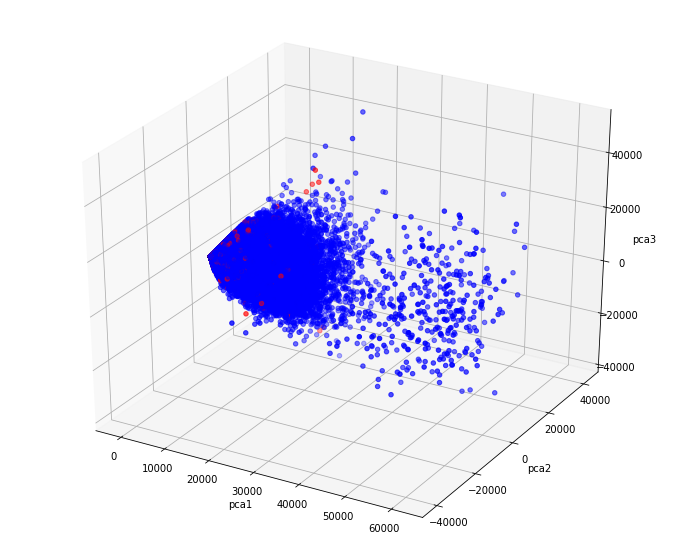

In [ ]:
plot_3d(pca_customers_df['pca1'], pca_customers_df['pca2'], pca_customers_df['pca3'],
        colors=['red' if x == 1 else 'blue' for x in transformed_data_df['label']])

In [ ]:
transformed_data_df['label'].value_counts()

0    503860
1    104834
Name: label, dtype: int64

#### Check Unavoidable Bias

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
M = 40

In [ ]:
standardized_transformed_data = pd.DataFrame(MinMaxScaler().fit_transform(transformed_data_df.iloc[:,:-1]),
                                             columns=[y+str(x) for x in range(M) for y in ['quantity_', 'price_', 'sku_id_']])
standardized_transformed_data['label'] = transformed_data_df['label']

In [ ]:
not_churned_subsample = standardized_transformed_data[standardized_transformed_data['label'] == 0].loc[np.random.choice(standardized_transformed_data[standardized_transformed_data['label'] == 0].index, 25000, replace=False)]

In [ ]:
churn_subsample = standardized_transformed_data[standardized_transformed_data['label'] == 1].loc[np.random.choice(standardized_transformed_data[standardized_transformed_data['label'] == 1].index, 25000, replace=False)]

In [ ]:
not_churned_subsample.mean()

quantity_0     0.000000
price_0        0.000000
sku_id_0       0.000000
quantity_1     0.000528
price_1        0.001662
                 ...   
sku_id_38      0.043101
quantity_39    0.000398
price_39       0.001339
sku_id_39      0.043925
label          0.000000
Length: 121, dtype: float64

In [ ]:
np.reshape(np.array(not_churned_subsample.mean()), (-1,121))

array([[0.        , 0.        , 0.        , 0.00052761, 0.00166174,
        0.04128091, 0.00053003, 0.00184678, 0.04042128, 0.00053234,
        0.00170071, 0.04283636, 0.00054886, 0.00180096, 0.04017957,
        0.00053267, 0.00171692, 0.04215182, 0.00052784, 0.00181857,
        0.04030723, 0.00053714, 0.00172967, 0.04296273, 0.00053334,
        0.00181559, 0.04009702, 0.0005207 , 0.00169144, 0.0423    ,
        0.0005509 , 0.00184154, 0.04123574, 0.0005357 , 0.00171784,
        0.04246273, 0.00051559, 0.00181236, 0.04062298, 0.0005293 ,
        0.00172907, 0.04272364, 0.00052094, 0.00184387, 0.04283022,
        0.00055006, 0.00174037, 0.04211091, 0.00052158, 0.00185568,
        0.04201778, 0.00054133, 0.00175221, 0.04312818, 0.000505  ,
        0.00178682, 0.04240978, 0.00052695, 0.00171538, 0.04214455,
        0.00052446, 0.00162303, 0.04254044, 0.00041629, 0.00137083,
        0.04326545, 0.00052137, 0.00163179, 0.04140533, 0.00040602,
        0.0013419 , 0.04330605, 0.00054504, 0.00

In [ ]:
distances_not_churned = euclidean_distances(not_churned_subsample, not_churned_subsample,
                    squared=False)

In [ ]:
np.average(distances_not_churned)

0.6556223312390012

In [ ]:
np.max(distances_not_churned)

5.063061657131732

In [ ]:
distances_not_churn_with_mean = euclidean_distances(standardized_transformed_data[standardized_transformed_data['label'] == 0].iloc[:,:-1],
                                                np.reshape(np.array(standardized_transformed_data[standardized_transformed_data['label'] == 0].iloc[:,:-1].mean()), (-1,120)),squared=False)

In [ ]:
np.average(distances_not_churn_with_mean)

0.45243493095278536

(array([1.90000e+02, 7.66700e+03, 1.03806e+05, 8.57340e+04, 6.67760e+04,
        5.33160e+04, 4.29520e+04, 3.46640e+04, 2.71820e+04, 2.13040e+04,
        1.73460e+04, 1.35910e+04, 1.12750e+04, 9.21600e+03, 7.14100e+03,
        5.54400e+03, 4.86000e+03, 3.94000e+03, 3.09800e+03, 2.63400e+03,
        1.90300e+03, 1.48700e+03, 1.21600e+03, 8.83000e+02, 7.34000e+02,
        6.77000e+02, 5.48000e+02, 4.23000e+02, 3.65000e+02, 3.30000e+02,
        3.27000e+02, 2.15000e+02, 2.00000e+02, 2.12000e+02, 1.77000e+02,
        1.33000e+02, 1.15000e+02, 8.00000e+01, 7.60000e+01, 6.20000e+01,
        5.60000e+01, 7.60000e+01, 2.80000e+01, 3.40000e+01, 3.70000e+01,
        2.90000e+01, 2.60000e+01, 2.20000e+01, 2.70000e+01, 1.70000e+01,
        1.60000e+01, 1.20000e+01, 1.60000e+01, 8.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.00000e+00, 3.00000e+00, 8.00000e+00, 7.00

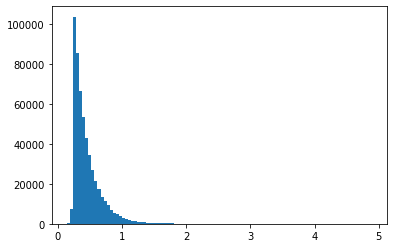

In [ ]:
plt.hist(distances_not_churn_with_mean, bins=100)

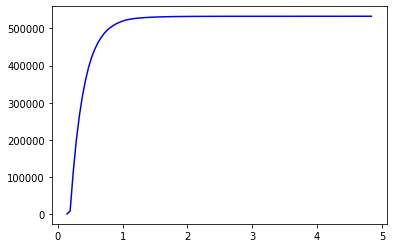

In [ ]:
values, base = np.histogram(distances_not_churn_with_mean, bins=100)
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

In [ ]:
cumulative[12], base[12]

(485803, 0.712487059441107)

In [ ]:
standardized_transformed_data[standardized_transformed_data['label'] == 1].mean()

quantity_0     0.000000
price_0        0.000000
sku_id_0       0.000000
quantity_1     0.000331
price_1        0.000850
                 ...   
sku_id_38      0.011006
quantity_39    0.000191
price_39       0.000448
sku_id_39      0.010605
label          1.000000
Length: 121, dtype: float64

In [ ]:
distances = euclidean_distances(churn_subsample, churn_subsample,
                    squared=False)

In [ ]:
np.average(distances)

0.3868800362772486

In [ ]:
distances_between_churned_not_churned = euclidean_distances(
    not_churned_subsample.iloc[:,:-1], 
    churn_subsample.iloc[:,:-1])

In [ ]:
np.average(distances_between_churned_not_churned)

0.5549292837770763

In [ ]:
non_zero_map = np.where(distances_between_churned_not_churned < 0.07, 1, 0)

In [ ]:
del(non_zero_map)

In [ ]:
not_churn_counter = 0
for i in range(non_zero_map.shape[0]):
  if np.count_nonzero(non_zero_map[i]) > 0:
    not_churn_counter += 1
not_churn_counter

1745

In [ ]:
churn_counter = 0
for i in range(non_zero_map.shape[1]):
  if np.count_nonzero(non_zero_map[:,i]) > 0:
    churn_counter += 1
churn_counter

7894

** if we acheive recall 0.7 we can acheive false positive rate equals equals to 0.06 in optimal rate

In [ ]:
distances_churn_with_mean = euclidean_distances(standardized_transformed_data[standardized_transformed_data['label'] == 1].iloc[:,:-1],
                                                np.reshape(np.array(standardized_transformed_data[standardized_transformed_data['label'] == 1].iloc[:,:-1].mean()), (-1,120)),squared=False)

In [ ]:
np.average(distances_churn_with_mean)

0.257764575368283

In [ ]:
np.std(distances_churn_with_mean)

0.17627779772888133

(array([6.2750e+03, 1.0298e+04, 8.5600e+03, 7.1070e+03, 5.9300e+03,
        4.9830e+03, 3.9790e+03, 2.9660e+03, 2.3750e+03, 1.7380e+03,
        1.3730e+03, 9.8000e+02, 7.5800e+02, 6.2600e+02, 4.5500e+02,
        3.0500e+02, 2.5900e+02, 1.9600e+02, 1.6100e+02, 1.5600e+02,
        1.0100e+02, 1.1200e+02, 7.1000e+01, 7.2000e+01, 5.0000e+01,
        4.1000e+01, 2.4000e+01, 2.7000e+01, 8.0000e+00, 6.0000e+00,
        1.3000e+01, 1.0000e+00, 4.0000e+00, 7.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 7.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00,
        7.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        5.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

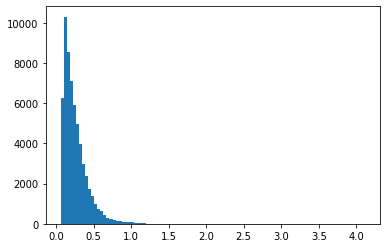

In [ ]:
plt.hist(distances_churn_with_mean, bins=100)

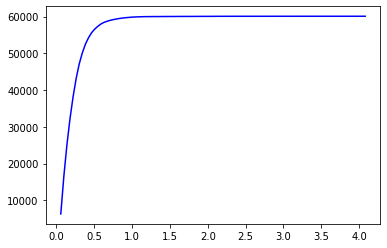

In [ ]:
values, base = np.histogram(distances_churn_with_mean, bins=100)
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

In [ ]:
cumulative[5], base[5]

(43153, 0.2650312264565802)

In [ ]:
np.linalg.norm(
    standardized_transformed_data[standardized_transformed_data['label'] == 1].iloc[:,:-1].mean()-standardized_transformed_data[standardized_transformed_data['label'] == 0].iloc[:,:-1].mean())

0.173333052635879

In [ ]:
distances_not_churn_with_mean_churn = euclidean_distances(standardized_transformed_data[standardized_transformed_data['label'] == 0].iloc[:,:-1],
                                                np.reshape(np.array(standardized_transformed_data[standardized_transformed_data['label'] == 1].iloc[:,:-1].mean()), (-1,120)),squared=False)

(array([1.1601e+04, 2.6655e+04, 3.5699e+04, 4.5507e+04, 5.1440e+04,
        5.0307e+04, 4.7601e+04, 4.3160e+04, 3.7828e+04, 3.2561e+04,
        2.7891e+04, 2.2520e+04, 1.8449e+04, 1.5270e+04, 1.2238e+04,
        1.0558e+04, 8.4250e+03, 6.4670e+03, 5.3850e+03, 4.5220e+03,
        3.7610e+03, 2.9610e+03, 2.3310e+03, 1.7300e+03, 1.3390e+03,
        1.0860e+03, 8.2100e+02, 7.4000e+02, 5.8900e+02, 4.6200e+02,
        3.9300e+02, 3.7500e+02, 3.2700e+02, 2.8900e+02, 2.1200e+02,
        2.0000e+02, 2.0400e+02, 1.4400e+02, 1.0300e+02, 9.4000e+01,
        7.2000e+01, 8.2000e+01, 6.0000e+01, 5.9000e+01, 3.8000e+01,
        3.3000e+01, 3.4000e+01, 3.0000e+01, 2.1000e+01, 2.3000e+01,
        2.6000e+01, 2.4000e+01, 1.7000e+01, 1.4000e+01, 1.2000e+01,
        1.2000e+01, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 3.0000e+00, 9.0000e+00,
        6.0000e+00, 1.0000e+01, 4.0000e+00, 1.10

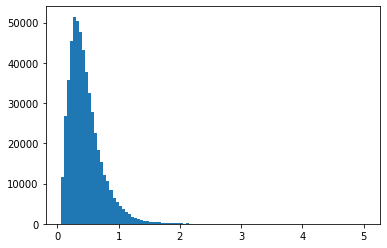

In [ ]:
plt.hist(distances_not_churn_with_mean_churn, bins=100)

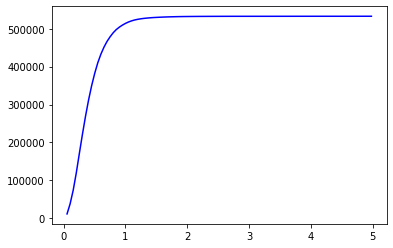

In [ ]:
values, base = np.histogram(distances_not_churn_with_mean_churn, bins=100)
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

In [ ]:
cumulative[4], base[4]

(170902, 0.25528029241544825)

** if we use a naive classifier predicts all instances in distance 0.25 from churn centers, acheivs recall equals to 0.7 and precision 0.2 on training set

### Modeling Using Neural Networks with Keras

In [ ]:
%tensorflow_version 2.x
%load_ext tensorboard
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
X_train = transformed_data_df.iloc[:,:-1]
y_train = transformed_data_df['label']

In [ ]:
y_train.value_counts()

0    503860
1    104834
Name: label, dtype: int64

In [ ]:
X_train.fillna(0, inplace=True)

In [ ]:
X_train.head()

,frequency,recency,recency_days_std,recency_days_mean,monetary,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,latency,duration,D/F,quantity_0,price_0,sku_id_0,quantity_1,price_1,sku_id_1,quantity_2,price_2,sku_id_2,quantity_3,price_3,sku_id_3,quantity_4,price_4,sku_id_4,quantity_5,price_5,sku_id_5,quantity_6,price_6,sku_id_6,quantity_7,price_7,sku_id_7,quantity_8,price_8,sku_id_8,quantity_9,...,sku_id_26,quantity_27,price_27,sku_id_27,quantity_28,price_28,sku_id_28,quantity_29,price_29,sku_id_29,quantity_30,price_30,sku_id_30,quantity_31,price_31,sku_id_31,quantity_32,price_32,sku_id_32,quantity_33,price_33,sku_id_33,quantity_34,price_34,sku_id_34,quantity_35,price_35,sku_id_35,quantity_36,price_36,sku_id_36,quantity_37,price_37,sku_id_37,quantity_38,price_38,sku_id_38,quantity_39,price_39,sku_id_39
0,3.0,8.0,4.925175,12.014925,194.03,1.971986,2.895970,0.69,11.00,22.0,11.0,13.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,52.0,107.72,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,3.0,11.0,4.802388,32.268293,196.08,1.741073,2.391220,0.30,8.61,3.0,27.0,13.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,68.69,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0,3.43,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,1.0,19.0,0.000000,19.000000,4.98,0.000000,2.490000,2.49,2.49,21.0,1.0,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,4.0,5.0,4.879136,11.164179,322.80,12.325940,4.817910,0.50,101.32,23.0,13.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,29.07,12.0,0.0,0.0,0.0,0.0,0.00,0.0,23.0,80.3,13.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,47.09,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,3.0,1.0,6.422327,9.698413,202.27,2.552343,3.210635,0.88,13.49,24.0,16.0,13.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,17.0,60.52,16.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,60.99,19.0


#### Training

In [ ]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                           activation='relu',
                           kernel_initializer='he_normal',
                           )

In [ ]:
model = keras.models.Sequential([
                           keras.layers.InputLayer(
                               X_train.shape[1:],
                               name='input_layer'
                               ),
                           keras.layers.BatchNormalization(),
                           RegularizedDense(64),
                           keras.layers.BatchNormalization(),
                           RegularizedDense(16),
                           keras.layers.BatchNormalization(),
                           keras.layers.Dropout(rate=0.5),
                           keras.layers.Dense(
                                1,
                                activation="sigmoid", 
                                name='output_layer',
                                kernel_initializer='glorot_normal',
                                ),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 132)               528       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8512      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                

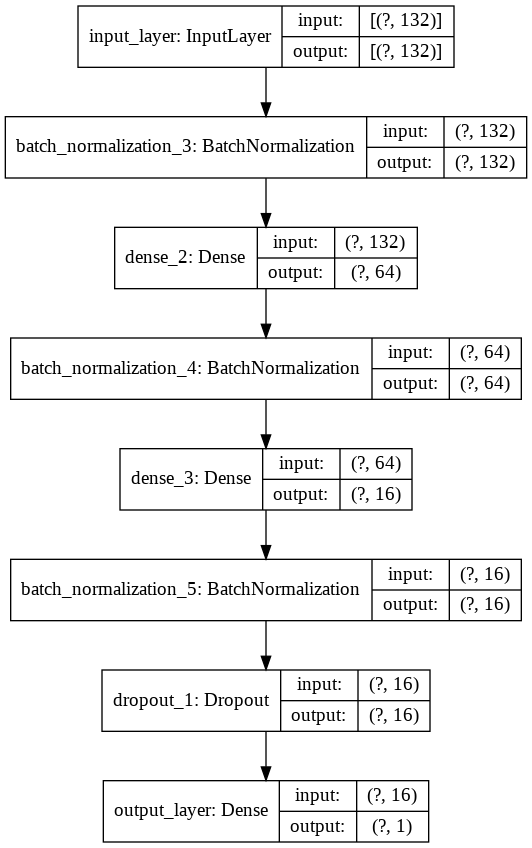

In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
        
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=optimizer,
    metrics=["accuracy","Precision","Recall", 'AUC', f1]
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.05,
    batch_size=2048,
    callbacks=[early_stopping],
    # class_weight={0: 0.2, 1:0.8}
)

Epoch 1/1000
283/283 [==============================] - 5s 19ms/step - loss: 0.6024 - accuracy: 0.7301 - precision: 0.3096 - recall: 0.4592 - auc: 0.6988 - f1: 0.3699 - val_loss: 0.3970 - val_accuracy: 0.8244 - val_precision: 0.4643 - val_recall: 0.3411 - val_auc: 0.7988 - val_f1: 0.3930
Epoch 2/1000
283/283 [==============================] - 5s 16ms/step - loss: 0.4178 - accuracy: 0.8185 - precision: 0.4450 - recall: 0.2115 - auc: 0.7688 - f1: 0.2848 - val_loss: 0.3647 - val_accuracy: 0.8287 - val_precision: 0.4734 - val_recall: 0.2385 - val_auc: 0.8089 - val_f1: 0.3170
Epoch 3/1000
283/283 [==============================] - 5s 16ms/step - loss: 0.3886 - accuracy: 0.8231 - precision: 0.4628 - recall: 0.1571 - auc: 0.7894 - f1: 0.2337 - val_loss: 0.3598 - val_accuracy: 0.8291 - val_precision: 0.4573 - val_recall: 0.1308 - val_auc: 0.8114 - val_f1: 0.2032
Epoch 4/1000
283/283 [==============================] - 5s 17ms/step - loss: 0.3779 - accuracy: 0.8250 - precision: 0.4741 - recall: 

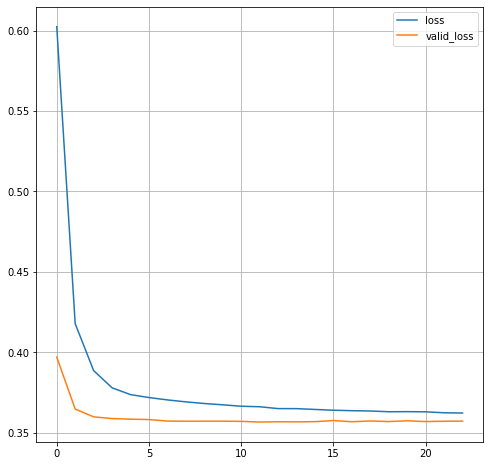

In [ ]:
pd.DataFrame({'loss':history.history['loss'],
              'valid_loss':history.history['val_loss'],
              }).plot(figsize=(8, 8))
plt.grid(True)

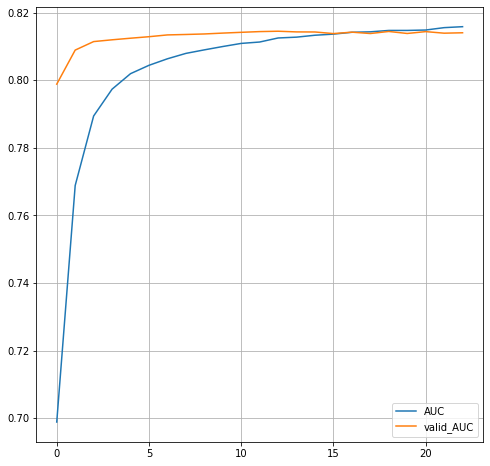

In [ ]:
pd.DataFrame({'AUC':history.history['auc'],
              'valid_AUC':history.history['val_auc'],
              }).plot(figsize=(8, 8))
plt.grid(True)

#### Fine Tunning

In [ ]:
transformed_data_df_not_churned = transformed_data_df[transformed_data_df['label']==0]
under_sampled_not_churned = transformed_data_df_not_churned.sample(100000)

In [ ]:
under_sampled_not_churned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 378661 to 29397
Columns: 133 entries, frequency to label
dtypes: float64(132), int64(1)
memory usage: 102.2 MB


In [ ]:
transformed_data_df_churned = transformed_data_df[transformed_data_df['label']==1]

In [ ]:
under_sampled = pd.concat([under_sampled_not_churned, transformed_data_df_churned], ignore_index=True)

In [ ]:
under_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204834 entries, 0 to 204833
Columns: 133 entries, frequency to label
dtypes: float64(132), int64(1)
memory usage: 207.8 MB


In [ ]:
pca = PCA(n_components=3)
pca_customers = pca.fit_transform(under_sampled.iloc[:,:-1])
pca_customers_df = pd.DataFrame(data=pca_customers, columns=['pca1', 'pca2', 'pca3'])

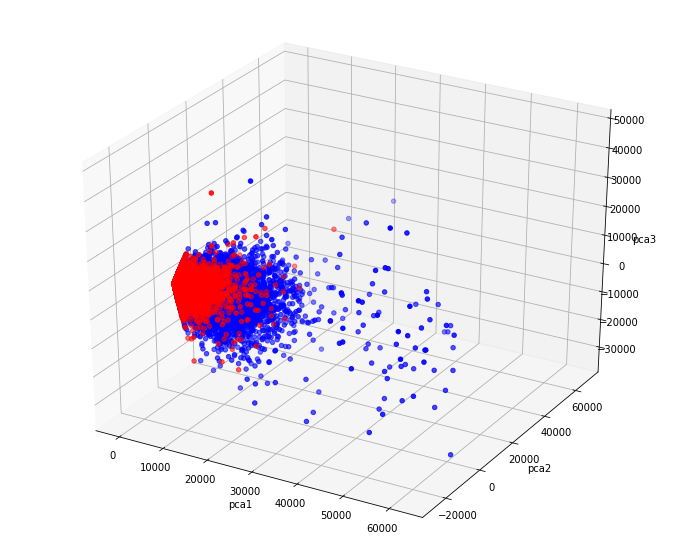

In [ ]:
plot_3d(pca_customers_df['pca1'], pca_customers_df['pca2'], pca_customers_df['pca3'],
        colors=['red' if x == 1 else 'blue' for x in under_sampled['label']])

In [ ]:
X_train = under_sampled.iloc[:,:-1]
y_train = under_sampled['label']

In [ ]:
y_train.value_counts()

1    104834
0    100000
Name: label, dtype: int64

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.1,
    batch_size=512,
    callbacks=[early_stopping],
)

Epoch 1/50
361/361 [==============================] - 3s 7ms/step - loss: 0.5372 - accuracy: 0.7278 - precision: 0.7014 - recall: 0.7053 - auc: 0.8014 - f1: 0.6905 - val_loss: 0.5513 - val_accuracy: 0.7770 - val_precision: 1.0000 - val_recall: 0.7770 - val_auc: 0.0000e+00 - val_f1: 0.8739
Epoch 2/50
361/361 [==============================] - 3s 7ms/step - loss: 0.5186 - accuracy: 0.7419 - precision: 0.6967 - recall: 0.7718 - auc: 0.8118 - f1: 0.7323 - val_loss: 0.5826 - val_accuracy: 0.7572 - val_precision: 1.0000 - val_recall: 0.7572 - val_auc: 0.0000e+00 - val_f1: 0.8615
Epoch 3/50
361/361 [==============================] - 3s 7ms/step - loss: 0.5168 - accuracy: 0.7434 - precision: 0.6972 - recall: 0.7765 - auc: 0.8130 - f1: 0.7346 - val_loss: 0.5557 - val_accuracy: 0.7794 - val_precision: 1.0000 - val_recall: 0.7794 - val_auc: 0.0000e+00 - val_f1: 0.8754
Epoch 4/50
361/361 [==============================] - 2s 7ms/step - loss: 0.5160 - accuracy: 0.7440 - precision: 0.6956 - recall: 

#### Evaluation


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
max(data_cleaned_customer_not_none_for_test['DAY']) - min(data_cleaned_customer_not_none_for_test['DAY'])

59

In [ ]:
test_transformed_data = transform_data(
    data_cleaned_customer_not_none_for_test,
    max(data_cleaned_customer_not_none_for_test['DAY']),
    min(data_cleaned_customer_not_none_for_test['DAY']),
    STRIDE_STEP,
    M,
    N,
    append_customer_id=True,
)
test_transformed_data.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Columns: 134 entries, household_key to label
dtypes: float64(132), int64(2)
memory usage: 2.1 MB


In [ ]:
test_transformed_data.head()

,household_key,frequency,recency,recency_days_std,recency_days_mean,monetary,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,latency,duration,D/F,quantity_0,price_0,sku_id_0,quantity_1,price_1,sku_id_1,quantity_2,price_2,sku_id_2,quantity_3,price_3,sku_id_3,quantity_4,price_4,sku_id_4,quantity_5,price_5,sku_id_5,quantity_6,price_6,sku_id_6,quantity_7,price_7,sku_id_7,quantity_8,price_8,sku_id_8,...,quantity_27,price_27,sku_id_27,quantity_28,price_28,sku_id_28,quantity_29,price_29,sku_id_29,quantity_30,price_30,sku_id_30,quantity_31,price_31,sku_id_31,quantity_32,price_32,sku_id_32,quantity_33,price_33,sku_id_33,quantity_34,price_34,sku_id_34,quantity_35,price_35,sku_id_35,quantity_36,price_36,sku_id_36,quantity_37,price_37,sku_id_37,quantity_38,price_38,sku_id_38,quantity_39,price_39,sku_id_39,label
0,1,4.0,1.0,12.442227,16.009009,287.84,1.460181,2.593153,0.46,10.00,8.0,32.0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.21,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,33.41,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,85.15,32.0,0
1,2,1.0,24.0,0.000000,24.000000,130.89,1.772295,2.218475,0.17,12.99,16.0,1.0,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,1.0,17.0,0.000000,17.000000,22.53,1.041100,1.733077,0.20,3.98,23.0,1.0,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,6,14.0,3.0,11.014597,21.933333,297.61,3.027057,3.306778,0.49,17.99,3.0,35.0,2.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,48.83,16.0,NaN,NaN,NaN,6.0,12.26,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,23.43,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.97,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,64.47,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7,6.0,4.0,11.684894,22.041176,466.92,1.882823,2.746588,0.34,15.59,1.0,36.0,6.666667,NaN,NaN,NaN,16.0,33.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,135.29,50.0,NaN,NaN,NaN,5.0,22.58,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,129.34,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,23.37,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
test_transformed_data.fillna(0, inplace=True)

##### Visualize Test Data

In [ ]:
test_transformed_data.fillna(0, inplace=True)

In [ ]:
pca = PCA(n_components=3)
pca_customers = pca.fit_transform(test_transformed_data.iloc[:,1:-1])
pca_customers_df = pd.DataFrame(data=pca_customers, columns=['pca1', 'pca2', 'pca3'])

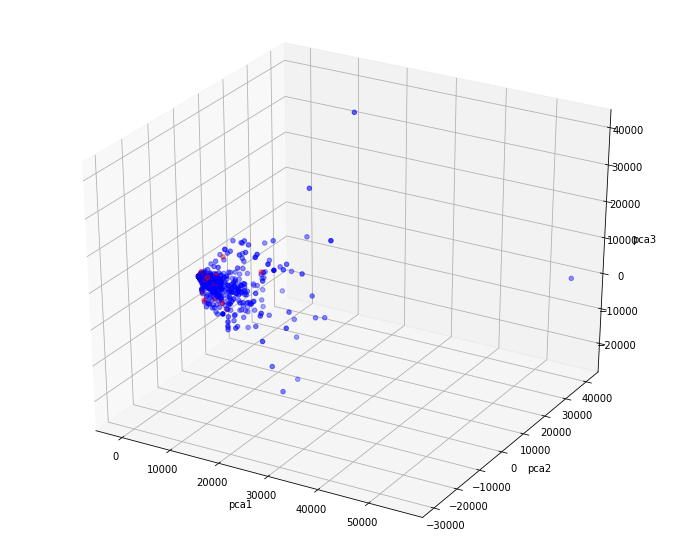

In [ ]:
plot_3d(pca_customers_df['pca1'], pca_customers_df['pca2'], pca_customers_df['pca3'],
        colors=['red' if x == 1 else 'blue' for x in test_transformed_data['label']])

##### Test

In [ ]:
customers_id = test_transformed_data['household_key']
X = test_transformed_data.iloc[:,1:-1]
y = test_transformed_data['label']

In [ ]:
y.value_counts()

0    1724
1     370
Name: label, dtype: int64

In [ ]:
X.head()

,frequency,recency,recency_days_std,recency_days_mean,monetary,SALES_VALUE_std,SALES_VALUE_mean,SALES_VALUE_min,SALES_VALUE_max,latency,duration,D/F,quantity_0,price_0,sku_id_0,quantity_1,price_1,sku_id_1,quantity_2,price_2,sku_id_2,quantity_3,price_3,sku_id_3,quantity_4,price_4,sku_id_4,quantity_5,price_5,sku_id_5,quantity_6,price_6,sku_id_6,quantity_7,price_7,sku_id_7,quantity_8,price_8,sku_id_8,quantity_9,...,sku_id_26,quantity_27,price_27,sku_id_27,quantity_28,price_28,sku_id_28,quantity_29,price_29,sku_id_29,quantity_30,price_30,sku_id_30,quantity_31,price_31,sku_id_31,quantity_32,price_32,sku_id_32,quantity_33,price_33,sku_id_33,quantity_34,price_34,sku_id_34,quantity_35,price_35,sku_id_35,quantity_36,price_36,sku_id_36,quantity_37,price_37,sku_id_37,quantity_38,price_38,sku_id_38,quantity_39,price_39,sku_id_39
0,4.0,1.0,12.442227,16.009009,287.84,1.460181,2.593153,0.46,10.00,8.0,32.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,37.0,90.21,34.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,33.41,9.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,38.0,85.15,32.0
1,1.0,24.0,0.000000,24.000000,130.89,1.772295,2.218475,0.17,12.99,16.0,1.0,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,1.0,17.0,0.000000,17.000000,22.53,1.041100,1.733077,0.20,3.98,23.0,1.0,40.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,14.0,3.0,11.014597,21.933333,297.61,3.027057,3.306778,0.49,17.99,3.0,35.0,2.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,48.83,16.0,0.0,0.0,0.0,6.0,12.26,5.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,12.0,23.43,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,18.97,3.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,14.0,64.47,12.0,0.0,0.0,0.0,0.0,0.00,0.0
4,6.0,4.0,11.684894,22.041176,466.92,1.882823,2.746588,0.34,15.59,1.0,36.0,6.666667,0.0,0.0,0.0,16.0,33.0,11.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,65.0,135.29,50.0,0.0,0.0,0.0,5.0,22.58,5.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,60.0,129.34,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10.0,23.37,8.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/churn_prediction_sokan/churn-predictor-m40-n10-st-2-time-depend_fine_tune.h5',
                   custom_objects={'f1': f1})

In [ ]:
model.save('/content/drive/My Drive/churn_prediction_sokan/churn-predictor-m40-n20-st-2-time-depend_fine_tune_agg_dunnhuby.h5')

In [ ]:
model.evaluate(X, y)

66/66 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7412 - precision: 0.3806 - recall: 0.7405 - auc: 0.8217 - f1: 0.4831


[0.4730972945690155,
 0.7411652207374573,
 0.38055557012557983,
 0.7405405640602112,
 0.821678876876831,
 0.48314863443374634]

#### Error Analysis


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
prediction = model.predict(X)

##### ROC Curve

In [ ]:
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y, prediction)
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

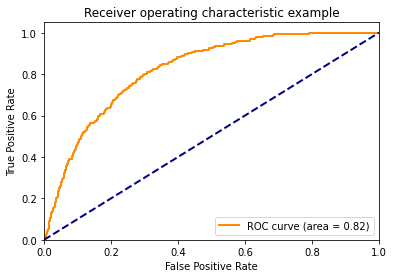

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tpr[1][300], fpr[1][300], thresholds[1][300]

(0.7027027027027027, 0.22505800464037123, 0.54816437)

Set threshold for classification to 0.54816437

In [ ]:
Threshold = 0.54816437

##### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_predict = [1 if x > Threshold else 0 for x in model.predict(X)]

In [ ]:
cm = confusion_matrix(y_true=y, y_pred=y_predict)

In [ ]:
cm_plot_labels = ['no churned','churned']

Confusion matrix, without normalization


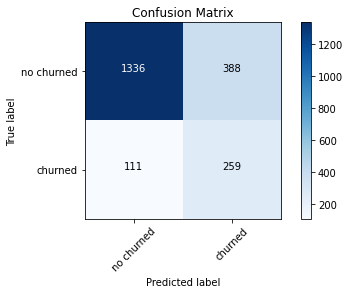

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
predicted_classes = pd.Series(y_predict)
FP_id = customers_id[(predicted_classes==1)&(y==0)]

In [ ]:
data_to_test = data_cleaned_customer_not_none_for_test[data_cleaned_customer_not_none_for_test['DAY'] > (max(data_cleaned_customer_not_none_for_test['DAY']) - N + 1)]
data_for_test = data_cleaned_customer_not_none_for_test[data_cleaned_customer_not_none_for_test['DAY'] <= (max(data_cleaned_customer_not_none_for_test['DAY']) - N + 1)]

In [ ]:
data_to_test.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,recency_days,latency_days
2520507,928,42039083480,693,925164,1,1.00,396,-0.99,1,100,0.0,0.0,18,692
2520508,928,42039083480,693,940501,1,2.99,396,0.00,1,100,0.0,0.0,18,692
2520509,928,42039083480,693,943833,1,1.19,396,0.00,1,100,0.0,0.0,18,692
2520510,928,42039083480,693,5564683,1,3.89,396,0.00,1,100,0.0,0.0,18,692
2520511,928,42039083480,693,8090521,1,4.69,396,-0.60,1,100,0.0,0.0,18,692


In [ ]:
data_for_test

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,recency_days,latency_days
2340645,1289,41492877888,652,15926885,1,1.50,31782,-0.99,16,94,0.0,0.0,59,651
2343504,2485,41493299518,652,821007,1,1.39,370,-0.10,15,94,0.0,0.0,59,651
2343505,2485,41493299518,652,825618,2,1.00,370,-0.58,15,94,0.0,0.0,59,651
2343506,2485,41493299518,652,833715,2,0.30,370,0.00,15,94,0.0,0.0,59,651
2343507,2485,41493299518,652,836051,1,0.65,370,0.00,15,94,0.0,0.0,59,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527139,1190,42049810302,692,1029743,1,2.49,370,0.00,1742,100,0.0,0.0,19,691
2527140,1190,42049810302,692,1068719,1,2.29,370,0.00,1742,100,0.0,0.0,19,691
2527141,1190,42049810302,692,1086252,1,1.89,370,-1.10,1742,100,0.0,0.0,19,691
2527142,1190,42049810302,692,10285022,1,3.49,370,-1.50,1742,100,0.0,0.0,19,691


In [ ]:
data_for_test['recency_days'] = data_for_test['recency_days'] - N + 1

In [ ]:
max(data_to_test['DAY']), min(data_to_test['DAY'])

(711, 693)

In [ ]:
max(data_for_test['DAY']), min(data_for_test['DAY'])

(692, 652)

##### False Positives

In [ ]:
FP_customers = data_to_test[data_to_test['household_key'].isin(FP_id)].groupby(['household_key']).agg({
    'BASKET_ID': pd.Series.nunique,
    'SALES_VALUE': 'sum',
})

In [ ]:
FP_customers

,BASKET_ID,SALES_VALUE
household_key,,
3,1,36.38
29,2,32.71
30,1,51.34
33,3,49.22
34,4,51.43
...,...,...
2460,5,79.35
2469,1,2.09
2485,4,69.63


In [ ]:
FP_customers['BASKET_ID'].value_counts()


1     206
2     113
3      59
4      30
5      14
6       8
7       3
8       2
13      1
9       1
Name: BASKET_ID, dtype: int64

In [ ]:
customers[customers.index.isin(FP_id)]['D/F'].describe()

count    437.000000
mean      14.851234
std       10.063738
min        1.228216
25%        7.853659
50%       12.679245
75%       18.444444
max       63.545455
Name: D/F, dtype: float64

In [ ]:
FP_customers = data_for_test[data_for_test['household_key'].isin(FP_id)].groupby(['household_key']).agg({
    'recency_days': 'min'
}).rename(columns={'recency_days': 'recency'})
FP_customers.describe()

,recency
count,437.000000
mean,12.375286
std,10.831746
min,0.000000
25%,2.000000
50%,10.000000
75%,19.000000
max,39.000000


##### True Positives

In [ ]:
TP_id = customers_id[(predicted_classes==1)&(y==1)]
TP_id

1          2
10        16
11        17
15        21
41        50
        ... 
2066    2468
2071    2474
2076    2480
2078    2482
2083    2487
Name: household_key, Length: 259, dtype: int64

In [ ]:
TP_customers = data_to_test[data_to_test['household_key'].isin(TP_id)].groupby(['household_key']).agg({
    'BASKET_ID': pd.Series.nunique,
    'SALES_VALUE': 'sum',
})

In [ ]:
TP_customers

,BASKET_ID,SALES_VALUE
household_key,,


In [ ]:
TP_customers = data_for_test[data_for_test['household_key'].isin(TP_id)].groupby(['household_key']).agg({
    'recency_days': 'min'
}).rename(columns={'recency_days': 'recency'})
TP_customers

,recency
household_key,
2,24
16,2
17,3
21,10
50,17
...,...
2468,30
2474,2
2480,5


In [ ]:
TP_customers.describe()

,recency
count,259.000000
mean,16.710425
std,11.927312
min,0.000000
25%,6.000000
50%,16.000000
75%,27.000000
max,39.000000


In [ ]:
customers[customers.index.isin(TP_id)]['D/F'].describe()

count    259.000000
mean      18.798780
std       11.602537
min        0.956938
25%       10.764165
50%       16.300000
75%       24.456731
max       57.181818
Name: D/F, dtype: float64

##### Plot KDE for D/F and Recency for Positives

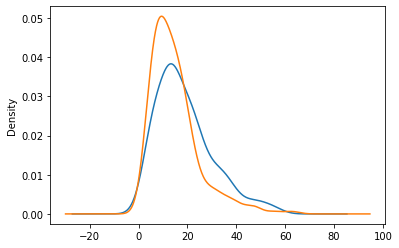

In [ ]:
customers[customers.index.isin(TP_id)]['D/F'].plot.kde()
customers[customers.index.isin(FP_id)]['D/F'].plot.kde()

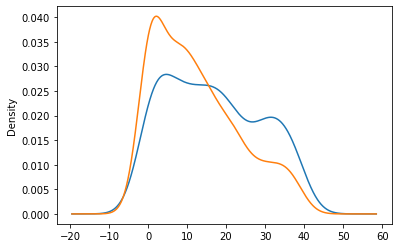

In [ ]:
TP_customers['recency'].plot.kde()
FP_customers['recency'].plot.kde()

In [ ]:
dataset = pd.DataFrame()
dataset['recency'] = TP_customers['recency']
dataset['D/F'] = customers[customers.index.isin(TP_id)]['D/F']
dataset['label'] = 'True Positive'
dataset2 = pd.DataFrame()
dataset2['recency'] = FP_customers['recency']
dataset2['D/F'] = customers[customers.index.isin(FP_id)]['D/F'] 
dataset2['label'] = 'False Positive'
dataset3 = pd.concat([dataset, dataset2])

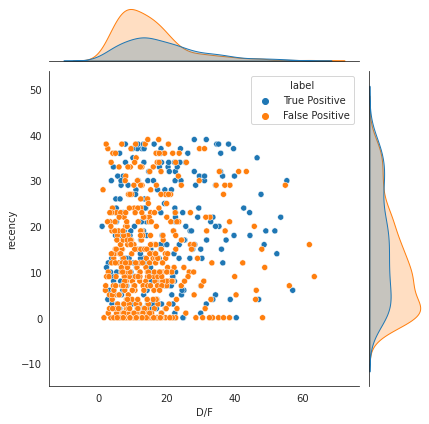

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(data=dataset3, x='D/F', y='recency', hue='label',)

##### True Negatives

In [ ]:
TN_id = customers_id[(predicted_classes==0)&(y==0)]
TN_id

0          1
3          6
4          7
5          8
7         13
        ... 
2087    2492
2088    2494
2090    2497
2091    2498
2093    2500
Name: household_key, Length: 1287, dtype: int64

In [ ]:
TN_customers = data_to_test[data_to_test['household_key'].isin(TN_id)].groupby(['household_key']).agg({
    'BASKET_ID': pd.Series.nunique,
    'SALES_VALUE': 'sum',
})
TN_customers

,BASKET_ID,SALES_VALUE
household_key,,
1,4,172.62
6,5,147.69
7,4,195.75
8,2,197.35
13,10,429.82
...,...,...
2492,6,93.06
2494,2,145.29
2497,3,138.15


In [ ]:
TN_customers['BASKET_ID'].value_counts()

1     212
3     211
2     196
4     167
5     130
6      83
7      59
8      56
9      47
10     25
11     18
12     17
14     14
13      9
17      8
15      7
16      6
18      4
19      4
20      4
21      2
33      2
41      1
25      1
27      1
30      1
39      1
47      1
Name: BASKET_ID, dtype: int64

In [ ]:
TN_customers = data_for_test[data_for_test['household_key'].isin(TN_id)].groupby(['household_key']).agg({
    'recency_days': 'min'
}).rename(columns={'recency_days': 'recency'})
TN_customers.describe()

,recency
count,1287.000000
mean,3.033411
std,3.928755
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,24.000000


In [ ]:
TN_customers.describe()

,recency
count,437.000000
mean,12.375286
std,10.831746
min,0.000000
25%,2.000000
50%,10.000000
75%,19.000000
max,39.000000


In [ ]:
customers[customers.index.isin(TN_id)]['D/F'].describe()

count    1287.000000
mean        6.307018
std         4.908714
min         0.485362
25%         3.243190
50%         5.016393
75%         7.862698
max        54.583333
Name: D/F, dtype: float64

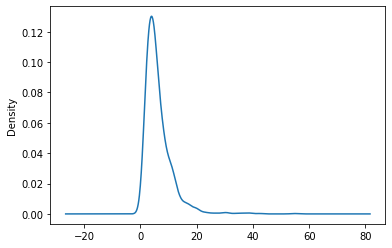

In [ ]:
customers[customers.index.isin(TN_id)]['D/F'].plot.kde()

##### False Negatives

In [ ]:
FN_id = customers_id[(predicted_classes==0)&(y==1)]
FN_id

6          9
32        39
49        59
84       100
106      123
        ... 
2063    2465
2068    2470
2072    2475
2073    2477
2089    2496
Name: household_key, Length: 111, dtype: int64

In [ ]:
FN_customers = data_to_test[data_to_test['household_key'].isin(FN_id)].groupby(['household_key']).agg({
    'BASKET_ID': pd.Series.nunique,
    'SALES_VALUE': 'sum',
})
FN_customers

,BASKET_ID,SALES_VALUE
household_key,,


In [ ]:
FN_customers = data_for_test[data_for_test['household_key'].isin(FN_id)].groupby(['household_key']).agg({
    'recency_days': 'min'
}).rename(columns={'recency_days': 'recency'})
FN_customers

,recency
household_key,
9,3
39,7
59,8
100,1
123,1
...,...
2465,6
2470,2
2475,7


In [ ]:
FN_customers.describe()

,recency
count,111.000000
mean,5.576577
std,4.984612
min,0.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,23.000000


In [ ]:
customers[customers.index.isin(FN_id)]['D/F'].describe()

count    111.000000
mean      12.403811
std        9.306349
min        1.573727
25%        6.417132
50%        9.573770
75%       15.735465
max       49.416667
Name: D/F, dtype: float64

##### Plot KDE for D/F and Recency for Negatives

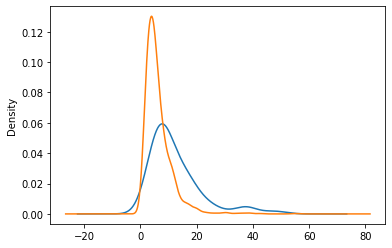

In [ ]:
customers[customers.index.isin(FN_id)]['D/F'].plot.kde()
customers[customers.index.isin(TN_id)]['D/F'].plot.kde()

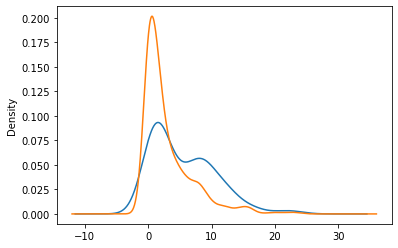

In [ ]:
FN_customers['recency'].plot.kde()
TN_customers['recency'].plot.kde()

In [ ]:
dataset = pd.DataFrame()
dataset['recency'] = FN_customers['recency']
dataset['D/F'] = customers[customers.index.isin(FN_id)]['D/F']
dataset['label'] = 'False Negative'
dataset2 = pd.DataFrame()
dataset2['recency'] = TN_customers['recency']
dataset2['D/F'] = customers[customers.index.isin(TN_id)]['D/F'] 
dataset2['label'] = 'True Negative'
dataset3 = pd.concat([dataset, dataset2])

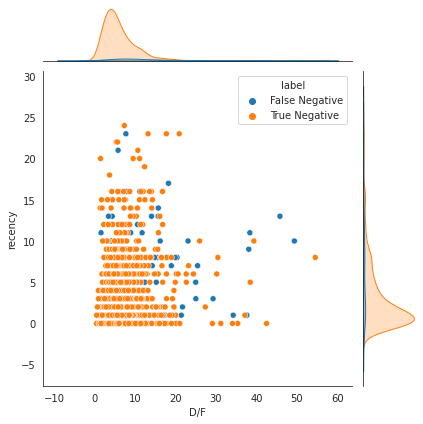

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(data=dataset3, x='D/F', y='recency', hue='label',)